<a href="https://colab.research.google.com/github/Gail529/chess_ML/blob/main/model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing necessary libraries

In [1]:
!pip install category_encoders

     |████████████████████████████████| 81kB 4.9MB/s 


In [2]:
import pandas as pd
import numpy as np
from sklearn.ensemble import VotingClassifier 
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics 
import category_encoders as ce
from category_encoders.hashing import HashingEncoder
from category_encoders.binary import BinaryEncoder
from sklearn.preprocessing import LabelEncoder 
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report 
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import IsolationForest
import warnings
warnings.filterwarnings(action='ignore')
warnings.filterwarnings(action='ignore', category=FutureWarning)
warnings.filterwarnings(action='ignore', category=RuntimeWarning)
warnings.filterwarnings(action='ignore', category=DeprecationWarning)
warnings.filterwarnings(action='ignore', category=UserWarning)


  

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
data=pd.read_csv('/content/games.csv',usecols=['turns','winner','white_rating','black_rating','opening_ply','opening_eco','increment_code'])


In [4]:
data.head()

,turns,winner,increment_code,white_rating,black_rating,opening_eco,opening_ply
0,13,white,15+2,1500,1191,D10,5
1,16,black,5+10,1322,1261,B00,4
2,61,white,5+10,1496,1500,C20,3
3,61,white,20+0,1439,1454,D02,3
4,95,white,30+3,1523,1469,C41,5


# Feature Engineering
feature generation

In [5]:
#creating a new feature
data['rating_diff'] = data['white_rating']-data['black_rating']
data.columns


Index(['turns', 'winner', 'increment_code', 'white_rating', 'black_rating',
       'opening_eco', 'opening_ply', 'rating_diff'],
      dtype='object')

Dropping null values


In [6]:
data.isnull().sum().sum()
data.dropna(axis=0,inplace=True)

Feature Scaling

In [7]:
#standardisation
from sklearn import preprocessing 
cols=['turns','white_rating', 'black_rating', 'opening_ply','rating_diff']
cols_to_scale=data[cols]
Standardisation = preprocessing.StandardScaler()  
scaled_cols= Standardisation.fit_transform(cols_to_scale) 
print ("\nStandardised columns : \n", scaled_cols) 
data[cols]=scaled_cols



Standardised columns : 
 [[-1.4139516  -0.33178766 -1.36698461  0.0654322   1.20949108]
 [-1.32458542 -0.94295461 -1.12645864 -0.29208323  0.21362897]
 [ 0.01590722 -0.34552175 -0.30523428 -0.64959865 -0.04738328]
 ...
 [-0.75859964 -1.2966074  -1.04055651 -0.64959865 -0.30036438]
 [ 1.44576604 -0.81248077 -1.24328554 -0.29208323  0.50275023]
 [ 0.52231555 -1.24167104 -0.858444   -0.64959865 -0.44894059]]


# Encoding categorical  variables

Using binary encoder

In [9]:
# label encoding the data 
categorical_feature_mask = data.dtypes==object
# filter categorical columns using mask and turn it into a list
categorical_cols = data.columns[categorical_feature_mask].tolist()
print(categorical_cols)
le = LabelEncoder() 
data['winner']= le.fit_transform(data['winner'])

#for categorical_cols with high cardinality
#binary encoding
encoder= ce.BinaryEncoder(cols=['opening_eco','increment_code'])
data_encoded=encoder.fit_transform(data) 

['increment_code', 'opening_eco']


Using frequency encoding

In [ ]:
# label encoding the data 
categorical_feature_mask = data.dtypes==object
# filter categorical columns using mask and turn it into a list
categorical_cols = data.columns[categorical_feature_mask].tolist()
print(categorical_cols)
le = LabelEncoder() 
data['winner']= le.fit_transform(data['winner'])


#frequency encoding for the categorical_cols with high cardinality
fe1= data.groupby('opening_eco').size()/len(data)
data.loc[:,'opening_encode']=data['opening_eco'].map(fe1)
fe_data=data.drop(columns=['opening_eco'],axis=1)


fe2= data.groupby('increment_code').size()/len(data)
data.loc[:,'incr_encode']=data['increment_code'].map(fe2)
fe_data=fe_data.drop(columns=['increment_code'],axis=1)



['increment_code', 'opening_eco']


# Feature Importance using RANDOM FOREST




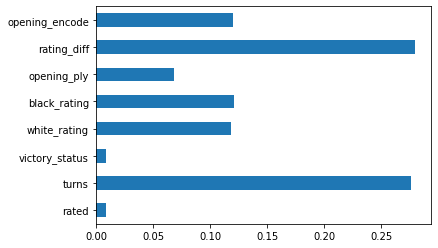

In [ ]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)
rf.feature_importances_
feat_importances = pd.Series(rf.feature_importances_, index=X_train.columns)
feat_importances.plot(kind='barh')


In [10]:
X = data_encoded.drop(columns=['winner'], axis=1)
y = data_encoded['winner']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Using Grid Search CV to find the best parameters

Logistic Regression


In [17]:
lr = LogisticRegression(multi_class='multinomial', solver='lbfgs',penalty='l2')
# fit the model with data
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
print("Test Set:",lr.score(X_test, y_test))
print("Training Set:",lr.score(X_train, y_train))
print(classification_report(y_test,y_pred))

Test Set: 0.6271186440677966
Training Set: 0.623519880344011
              precision    recall  f1-score   support

           0       0.62      0.59      0.60      1816
           1       0.50      0.01      0.01       192
           2       0.63      0.72      0.67      2004

    accuracy                           0.63      4012
   macro avg       0.58      0.44      0.43      4012
weighted avg       0.62      0.63      0.61      4012



In [14]:

model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train,y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))


Best: 0.621941 using {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}


K Nearest Neighbours

In [19]:
knn_grid =GridSearchCV(estimator=KNeighborsClassifier() ,param_grid={'n_neighbors':np.arange(1,20)} ,cv=5)
knn_grid.fit(X,y)
knn_grid.best_params_


{'n_neighbors': 19}

Support Vector Machines


In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C':[0.1,1,10],'gamma':[1,0.1,0.01],'kernel':['linear']}
scores ='accuracy'
grid = GridSearchCV(SVC(), param_grid,n_jobs=-1,scoring='accuracy')
 
def fit_cv_subsample (pipe_cv, X, y, n_max = 5000):
    '''
    This function fits a CV in a subsample of the first n_max rows
    returns the trained pipe and the best estimator
    '''
    X_sub = X[0:n_max]
    y_sub = y[0:n_max]
    pipe_cv.fit(X_sub,y_sub)
    #pipe_cv.best_estimator_.fit(X,y)
    return pipe_cv, pipe_cv.best_estimator_


results, best_model = fit_cv_subsample(grid,X_train,y_train)

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C':[0.1,1,10],'gamma':[1,0.1,0.01],'kernel':['linear']}
scores = ['precision', 'recall']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

grid = GridSearchCV(SVC(), param_grid, scoring='%s_macro' % score)
grid.fit(X_train, y_train)
print("Best parameters set found on development set:")
print()
print(grid.best_params_)


# Tuning hyper-parameters for precision

# Tuning hyper-parameters for recall



In [ ]:
from sklearn import model_selection,svm
SVM=svm.SVC(C=1.0,kernel='linear')
SVM.fit(X_train,y_train)

In [ ]:
predictions=SVM.predict(x_tfidf_test)
from sklearn.metrics import classification_report  #training the model using tfidf provides a higher accuracy for SVM
print(classification_report(y_test,predictions))

In [ ]:
print(grid.best_estimator_)

# Hard Voting Ensemble 

In [ ]:
models = [] 
models.append(('LR',LogisticRegression()))
models.append(('SVC', SVC(gamma ='auto', probability = True))) 
models.append(('DTC', DecisionTreeClassifier()))
models.append(('knn1', KNeighborsClassifier(n_neighbors=1)))
  

In [ ]:
vot_hard = VotingClassifier(estimators = models, voting ='hard') 
vot_hard.fit(X_train, y_train) 
y_pred = vot_hard.predict(X_test) 
  
# using accuracy_score metric to predict accuracy 
score = accuracy_score(y_test, y_pred) 
print("Hard Voting Score % d" % score) 
  
# Voting Classifier with soft voting 
vot_soft = VotingClassifier(estimators = models, voting ='soft') 
vot_soft.fit(X_train, y_train) 
y_pred = vot_soft.predict(X_test) 
  
# using accuracy_score 
score = accuracy_score(y_test, y_pred) 
print("Soft Voting Score % d" % score)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Hard Voting Score  0


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
